In [17]:
import torch
import torchvision
from torchvision import datasets
import matplotlib.pyplot as plt

In [18]:
# 数据集下载保存的路径
DATA_PATH = "./data/datasets"

# 载入数据集
cifar10_train = datasets.CIFAR10(DATA_PATH, train=True, download=True)
cifar10_val = datasets.CIFAR10(DATA_PATH, train=False, download=True)

len(cifar10_train), len(cifar10_val)

Files already downloaded and verified
Files already downloaded and verified


(50000, 10000)

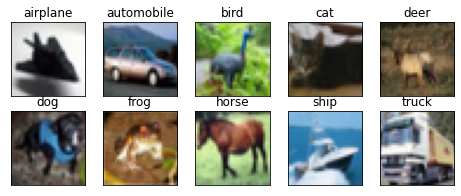

In [19]:
# 绘图
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

fig = plt.figure(figsize=(8,3))
num_classes = 10
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    img = next(img for img, label in cifar10_train if label == i)
    plt.imshow(img)
plt.show()

In [20]:
# 获取训练集中某一个样本
img, label = cifar10_train[99]
print(img)
print(label)

<PIL.Image.Image image mode=RGB size=32x32 at 0x22B545220C8>
1


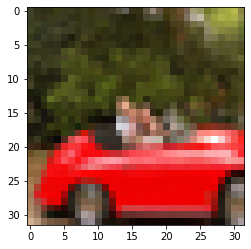

In [21]:
plt.imshow(img)
plt.show()

In [22]:
from torchvision import transforms

# transforms.ToTensor：将PIL图像或NumPy转为Tensor
# 原始数据范围[0, 255]被缩放为[0.0, 1.0]
to_tensor = transforms.ToTensor()
img_tensor = to_tensor(img)
print(img_tensor.shape)
print(img_tensor.dtype)
print(img_tensor.min())
print(img_tensor.max())

torch.Size([3, 32, 32])
torch.float32
tensor(0.)
tensor(1.)


In [23]:
# 标准化Normalization
# 将数据集中每个Channel的均值调整为0，标准差调整为1

# 首先计算每个Channel的均值和方差
cifar10_train = datasets.CIFAR10(DATA_PATH,
                                  train=True,
                                  download=False,
                                  transform=transforms.ToTensor())
imgs = torch.stack([img for img, _ in cifar10_train], dim=-1)
imgs.shape

torch.Size([3, 32, 32, 50000])

In [24]:
imgs_reshaped = imgs.reshape(3, -1)
imgs_reshaped.mean(dim=1)

tensor([0.4915, 0.4823, 0.4468])

In [25]:
imgs_reshaped.std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [26]:
# 利用上述计算结果，进行transforms.Normalize
cifar10_train = datasets.CIFAR10(
    DATA_PATH,
    train=True,
    download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize([0.4915, 0.4823, 0.4468],
                             [0.2470, 0.2435, 0.2616],),
    ]),
)